In [217]:
import numpy as np
import cmath
import matplotlib.pyplot as plt

from src.spike_utils import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [223]:
NUM_SAMPLES = 1000
NUM_SPIKES = 3

In [224]:
spikes = n_uniform_spikes(NUM_SPIKES)
isi_arr = spikes[1:] - spikes[:-1]
spikes

array([0.19755522, 0.46294305, 0.67911651])

In [225]:
magnitudes_periods = compute_fourier_period_profile(spikes, num_samples=NUM_SAMPLES)
magnitudes_freqs = compute_fourier_freq_profile(spikes, num_samples=NUM_SAMPLES)

(0.0, 0.796163488501448)

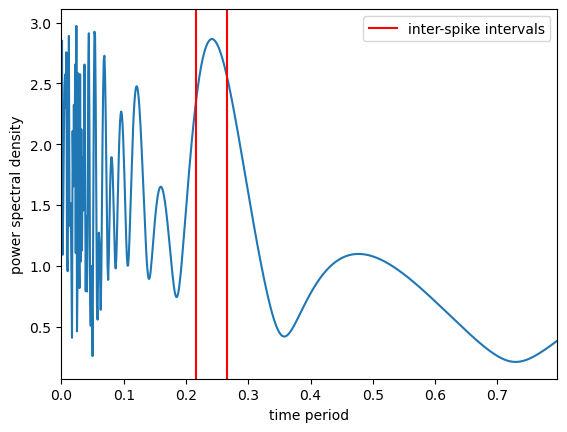

In [226]:
### periods
plt.plot(np.linspace(0, 1, NUM_SAMPLES), magnitudes_periods)
plt.xlabel('time period')
plt.ylabel('power spectral density')

for idx, isi in enumerate(isi_arr):
    label_arr = '' if idx > 0 else 'inter-spike intervals'
    plt.axvline(isi, color='r', label=label_arr)
plt.legend()
plt.xlim(0, isi_arr[0] * 3)

/var/folders/99/scv9lj4s4vgdsc2mp350clcc0000gn/T/ipykernel_12746/2593842782.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1 / np.linspace(0, 1, NUM_SAMPLES), magnitudes_freqs)


(0.0, 18.840351531609727)

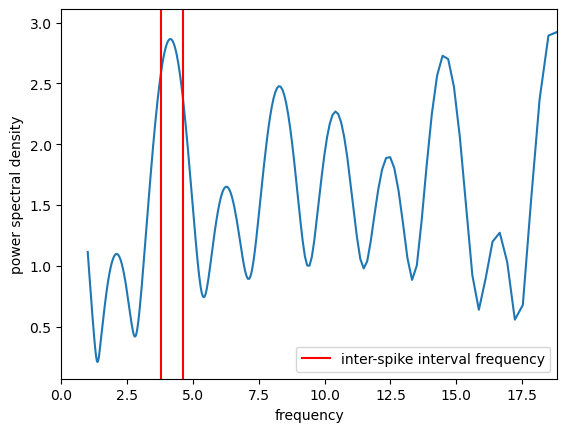

In [227]:
### frequencies
plt.plot(1 / np.linspace(0, 1, NUM_SAMPLES), magnitudes_freqs)
plt.xlabel('frequency')
plt.ylabel('power spectral density')

for idx, isi in enumerate(isi_arr):
    label_arr = '' if idx > 0 else 'inter-spike interval frequency'
    plt.axvline(1 / isi, color='r', label=label_arr)
plt.legend()
plt.xlim(0, 1/ isi_arr[0] * 5)

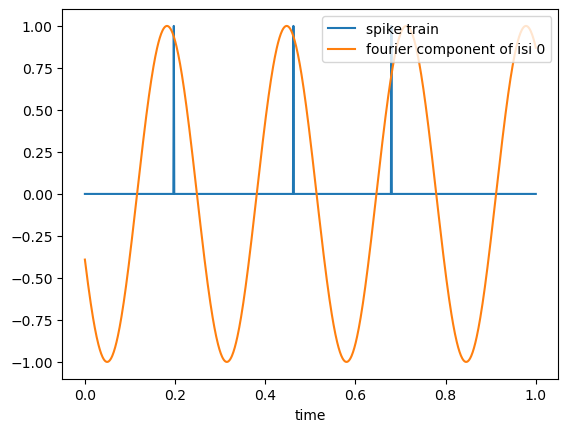

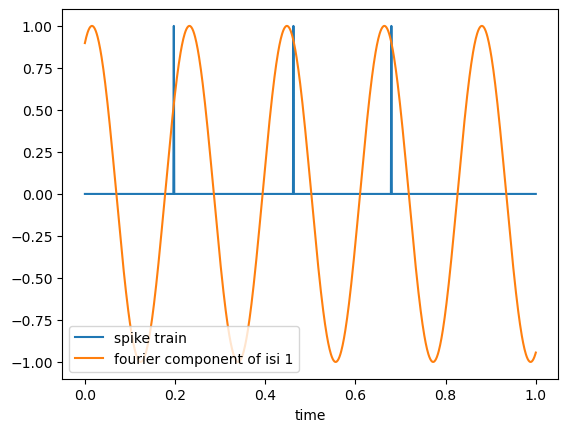

In [228]:
time = np.linspace(0, 1, NUM_SAMPLES)
spike_signal = compute_spike_signal(spikes, NUM_SAMPLES)


for idx, isi in enumerate(isi_arr):
    wave_signal = compute_isi_wave(isi, spikes, NUM_SAMPLES)
    plt.plot(time, spike_signal, label='spike train')
    plt.plot(time, wave_signal, label=f'fourier component of isi {idx}')
    plt.xlabel('time')
    plt.legend()
    plt.show()
